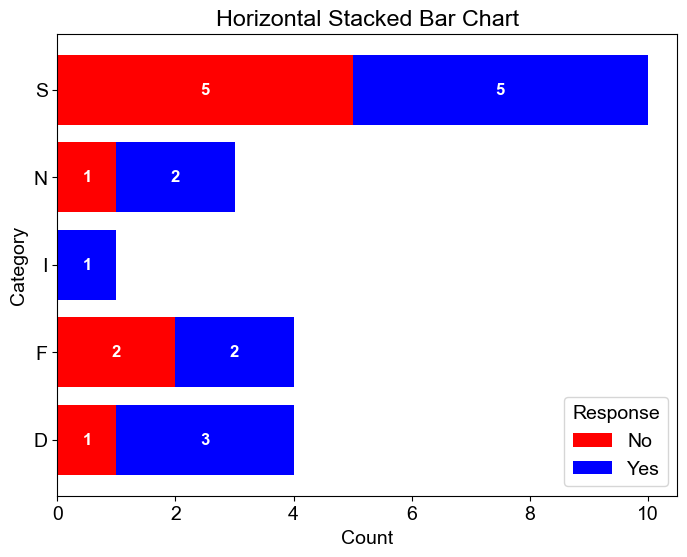

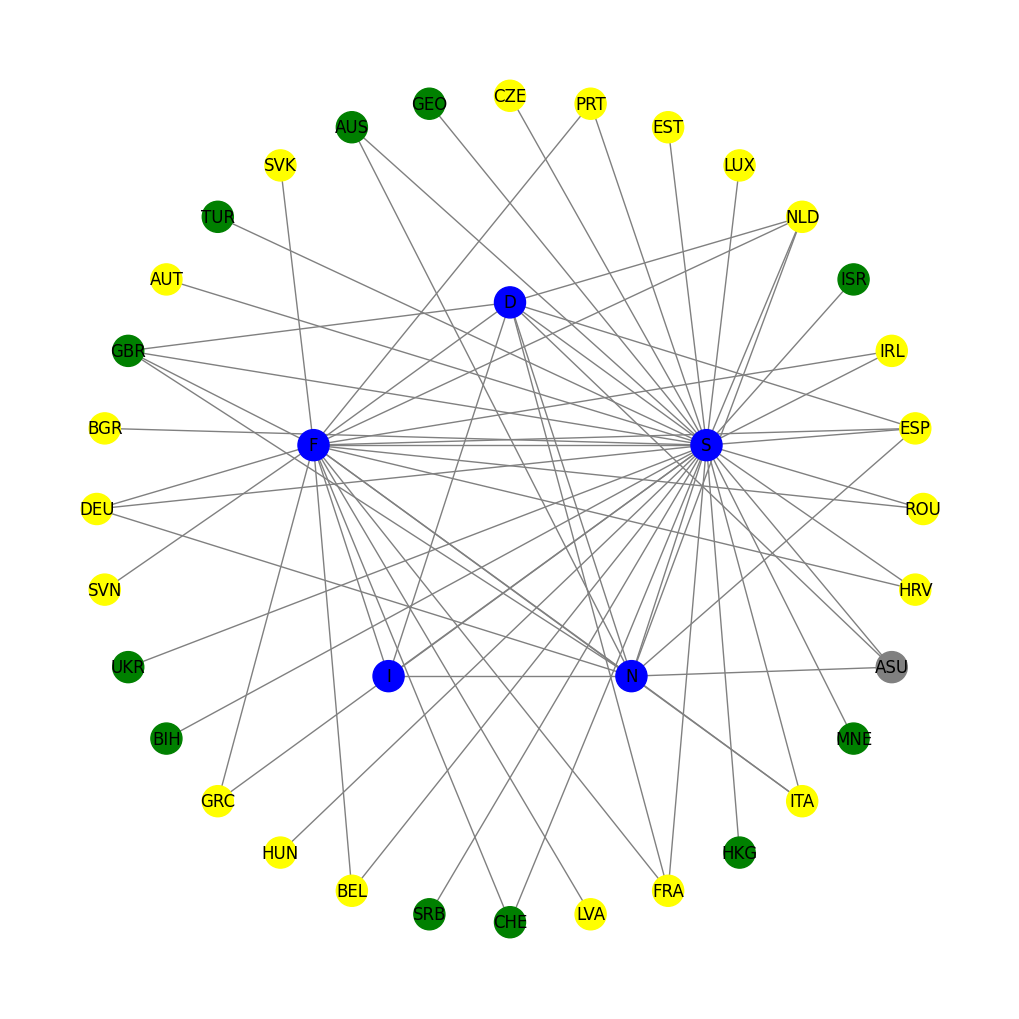

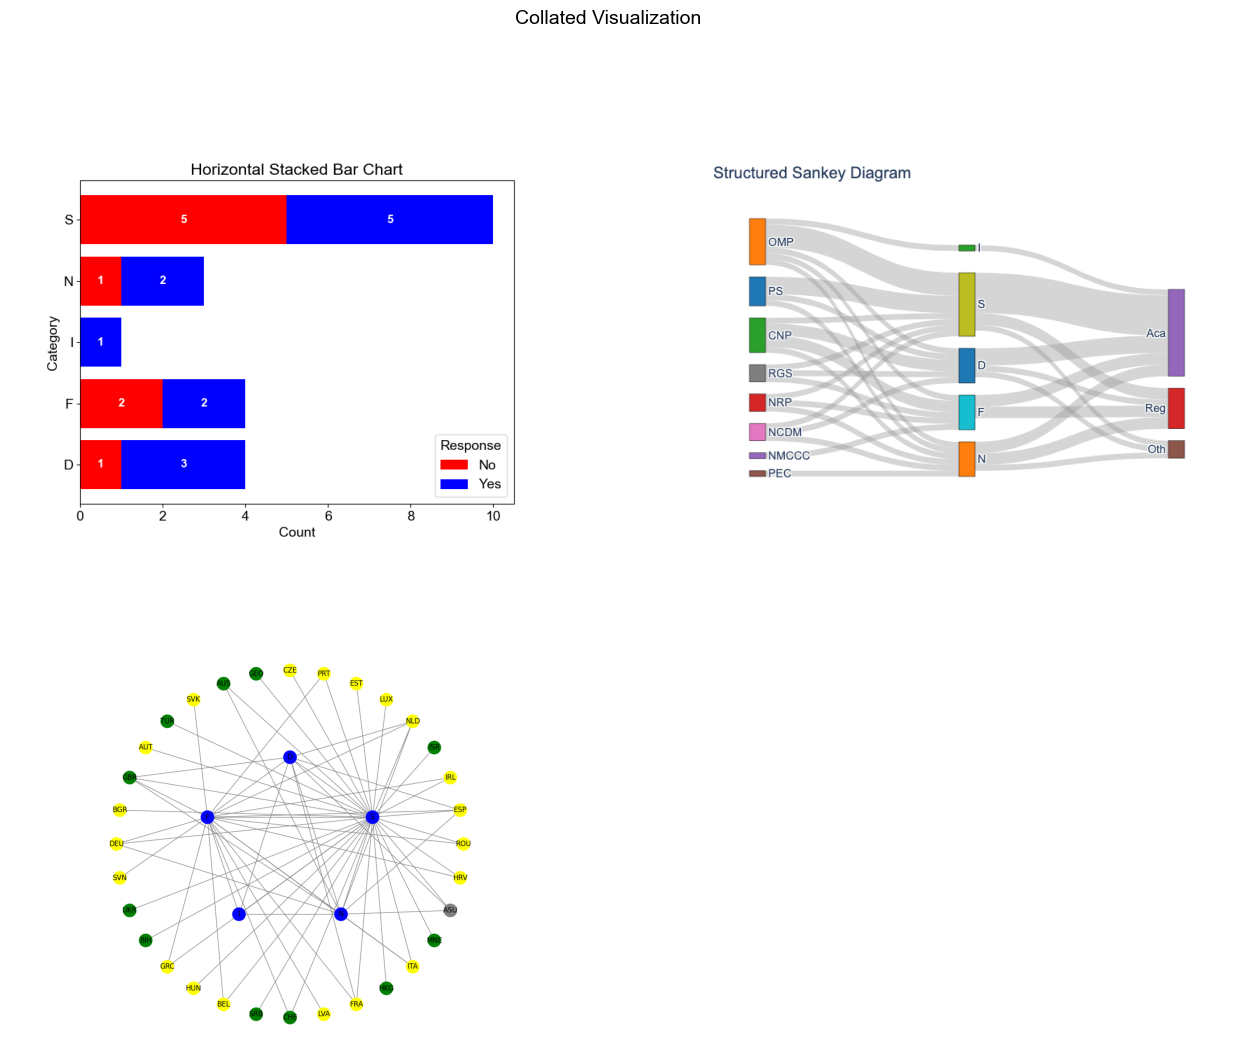

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import networkx as nx
from matplotlib.patches import Patch

# Load Data
bar_data = pd.read_csv("bar_assignment.csv")
sankey_data = pd.read_csv("sankey_assignment.csv")
network_data = pd.read_csv("networks_assignment (1).to_csv")

plt.rcParams.update({
    "font.family": "Arial",  # Change to preferred font
    "font.size": 14          # Adjust size for readability
})

# Convert 1 -> "Yes", 0 -> "No"
bar_data["COUNT"] = bar_data["COUNT"].map({1: "Yes", 0: "No"})

# Pivot data for stacking
pivot_table = bar_data.pivot_table(index="LABEL", columns="COUNT", aggfunc="size", fill_value=0)

# Extract Yes and No counts
yes_counts = pivot_table["Yes"]
no_counts = pivot_table["No"]

# Set up figure
plt.figure(figsize=(8, 6))

# Create horizontal stacked bars
bars1 = plt.barh(pivot_table.index, no_counts, color="red", label="No")
bars2 = plt.barh(pivot_table.index, yes_counts, left=no_counts, color="blue", label="Yes")

# Add values inside the bars
for bars in [bars1, bars2]:
    for bar in bars:
        width = bar.get_width()
        if width > 0:
            plt.text(bar.get_x() + width / 2,  # Position text in the middle of the bar
                     bar.get_y() + bar.get_height() / 2,
                     int(width),
                     ha="center", va="center", fontsize=12, fontweight="bold", color="white")

# Labels and formatting
plt.xlabel("Count")
plt.ylabel("Category")
plt.title("Horizontal Stacked Bar Chart")
plt.xticks([0, 2, 4, 6, 8, 10])
plt.legend(title="Response")

# Save figure
plt.savefig("bar_chart.png")

# Show plot
plt.show()

# --- Sankey Diagram ---
# Define first and last columns for sources and targets
first_layer_sources = ["PS", "OMP", "CNP", "NRP", "NMCCC", "PEC", "NCDM", "RGS"]
final_layer_targets = ["Reg", "Aca", "Oth"]

# Prepare lists for Sankey connections
source, target, value = [], [], []


for src in first_layer_sources:
    for i, label in enumerate(sankey_data["LABEL"]):
        source.append(src)
        target.append(label)
        value.append(sankey_data[src][i])  # Get corresponding value

for tgt in final_layer_targets:
    for i, label in enumerate(sankey_data["LABEL"]):
        source.append(label)
        target.append(tgt)
        value.append(sankey_data[tgt][i])  # Get corresponding value

# Create a unique list of nodes in order
all_nodes = list(dict.fromkeys(source + target))

# Create index mapping for nodes
node_indices = {node: i for i, node in enumerate(all_nodes)}

# Create Sankey diagram
sankey = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes,
        color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"] * 3  # Repeated for variety
    ),
    link=dict(
        source=[node_indices[s] for s in source],
        target=[node_indices[t] for t in target],
        value=value,
        color="rgba(150,150,150,0.4)"  # Semi-transparent links for clarity
    )
))

sankey.update_layout(
    title_text="Structured Sankey Diagram",
    font=dict(family="Arial", size=14),  # Set font for Plotly
    paper_bgcolor="white"
)

# Save the figure
sankey.write_image("sankey_diagram.png")

# Show the plot
sankey.show()

# --- Network Graph ---
G = nx.Graph()
central_nodes = ["D", "F", "I", "N", "S"]
blue_nodes = central_nodes
green_nodes = ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA']
yellow_nodes = ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']
node_colors = {}
for node in blue_nodes:
    node_colors[node] = "blue"
for node in green_nodes:
    node_colors[node] = "green"
for node in yellow_nodes:
    node_colors[node] = "yellow"
for col in network_data.columns[1:]:
    for index, row in network_data.iterrows():
        if row[col] > 0:
            G.add_edge(row["LABELS"], col)
plt.figure(figsize=(10, 10))
pos = nx.shell_layout(G, nlist=[central_nodes, list(G.nodes - set(central_nodes))])
nx.draw(G, pos, with_labels=True, node_color=[node_colors.get(n, "gray") for n in G.nodes], edge_color="gray", node_size=500)
plt.savefig("network_graph.png")

# --- Combining all graphs ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'height_ratios': [1, 1], 'width_ratios': [1, 1]})

# Read images
bar_img = plt.imread("bar_chart.png")
sankey_img = plt.imread("sankey_diagram.png")
network_img = plt.imread("network_graph.png")

# Place images in subplots
axes[0, 0].imshow(bar_img)
axes[0, 0].axis("off")
axes[0, 1].imshow(sankey_img)
axes[0, 1].axis("off")
axes[1, 0].imshow(network_img)
axes[1, 0].axis("off")

# Hide the unnecessary empty subplot
fig.delaxes(axes[1, 1])  # Removes the bottom-right empty plot

# Title for the final visualization
fig.suptitle("Collated Visualization", fontsize=14, fontname="Arial")

# Save the corrected final visualization
plt.savefig("final_visualization.png", dpi=300)
plt.show()

